<a href="https://colab.research.google.com/github/SpeedofLight007/churn-explorer_MLencoded/blob/main/MVP_Churn_Explorer_2_ML_encoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MVP Churn Explorer 2 -- ML encoded**
**Autor:** _Marcelo Santos ARaujo_  

**Data:** 28/08/2025

**Matrícula:** 4052024002227

**Dataset:** Churn Explorer // Churn_Dataset.csv


*   Item da lista
*   Item da lista



## 1. Escopo, objetivo e definição do problema
**TODO:** Explique brevemente:
- Contexto do problema e objetivo (ex.: previsão de churn, detecção de fraude, previsão de demanda, segmentação de clientes etc.).
- Tipo de tarefa: **classificação**, **regressão**, **clusterização** ou **séries temporais (forecasting)**.
- Área de aplicação: visão computacional, NLP, dados tabulares, sensores, etc.
- Valor para o negócio/usuário.

**Tipo de Problema: O Cuidado com o Cliente e a Dor da Despedida**

Imagine que, para uma empresa de telecomunicações, cada cliente é como um relacionamento construído com tempo e confiança. Quando um cliente decide cancelar seu serviço (o que chamamos de "churn"), não é apenas um número a menos; é como uma "despedida" dolorosa.

Para essas empresas, o churn é um dos indicadores mais importantes e temidos, por várias razões que tocam diretamente o coração do negócio:

Impacto Financeiro Direto: Cada cliente que se vai leva consigo a receita mensal que pagava, e para reconquistar um cliente perdido ou atrair um novo, a empresa gasta muito mais em publicidade e promoções do que para manter um cliente feliz. É como se fosse mais caro fazer novos amigos do que cuidar dos que já se tem.

Erosão da Base: Se muitos clientes começam a ir embora, a base da empresa encolhe, perdendo sua força e capacidade de crescimento no mercado.

Sinal de Alerta: Um churn elevado é um grito de que algo não vai bem. Pode ser a qualidade do serviço, o preço, o atendimento, ou até mesmo cobranças que geram insatisfação. A empresa vê isso como um termômetro de sua própria saúde.

**Contexto do Problema e Objetivo:**

Para uma empresa de telecomunicações, a perda de clientes (churn) representa um desafio significativo. Cada cliente que cancela seu serviço acarreta um impacto financeiro direto, pois leva consigo a receita recorrente e exige custos mais altos para aquisição de novos clientes em comparação com a retenção de clientes existentes. Além disso, um alto índice de churn pode erodir a base de clientes e servir como um sinal de alerta sobre possíveis problemas na qualidade do serviço, preço, atendimento ou outros fatores que geram insatisfação.

O objetivo principal deste projeto é **identificar proactivamente os clientes que estão em maior risco de churn** antes que eles tomem a decisão de cancelar o serviço. Ao prever quais clientes são propensos a "se despedir", a empresa pode implementar estratégias de retenção direcionadas e personalizadas, buscando abordar as causas da insatisfação e fortalecer o relacionamento com o cliente.

É por isso que este é um problema de classificação supervisionada de extrema importância: queremos identificar proactivamente quais clientes estão mais propensos a "se despedir" antes que eles de facto o façam. Ao prever quem está em risco, a empresa pode estender a mão a tempo, oferecer soluções personalizadas e, acima de tudo, mostrar que se importa em manter aquele relacionamento, transformando uma possível "despedida" em uma história de sucesso e fidelidade.

**Tipo de Tarefa:**

Este é um problema de **classificação supervisionada**. Dado um conjunto de dados históricos com informações sobre clientes e se eles deram churn ou não, o modelo aprenderá a classificar novos clientes em uma das duas classes: "Churn" (irão cancelar) ou "Não Churn" (irão permanecer).

**Área de Aplicação:**

Os dados utilizados são **dados tabulares**, contendo informações estruturadas sobre o perfil e o comportamento dos clientes.

**Valor para o Negócio/Usuário:**

O valor para o negócio é substancial. Ao prever o churn, a empresa pode:
- **Reduzir a perda de receita:** Intervenções de retenção bem-sucedidas evitam a perda de clientes pagantes.
- **Otimizar investimentos em retenção:** Direcionar recursos para clientes de alto risco é mais eficiente do que abordagens generalizadas.
- **Melhorar a satisfação do cliente:** Ao resolver proactivamente os problemas que levam ao churn, a empresa pode aumentar a satisfação e a fidelidade do cliente.
- **Obter insights sobre os ofensores de churn:** A análise do modelo pode revelar quais características ou comportamentos dos clientes estão mais associados ao churn, fornecendo informações valiosas para melhorias operacionais e estratégicas.

### 2.2 Funções python (opcional)

Nesta jornada de desvendar o churn, criamos algumas ferramentas especiais - nossas funções Python opcionais. Pense nelas como lentes personalizadas que nos ajudam a enxergar além do óbvio nos resultados dos nossos modelos.

- A função `evaluate_classification` é como um "termômetro de precisão" para o nosso modelo de churn. Ela nos diz o quão bem ele está separando os clientes que ficam dos que vão embora, usando métricas como acurácia e F1-score.
- Se estivéssemos prevendo um valor contínuo (como o tempo de permanência), usaríamos a `evaluate_regression`, nossa "régua de exatidão" para medir o quão perto nossas previsões chegam dos valores reais.
- E para agrupar clientes com perfis semelhantes, a `evaluate_clustering` seria nossa "bússola de similaridade", indicando o quão bem definidos e separados estão esses grupos.

Essas funções nos dão uma visão clara e objetiva do desempenho do modelo, garantindo que estamos no caminho certo para entender e prever o comportamento do cliente.

## 2. Reprodutibilidade e ambiente
Especifique o ambiente. Por exemplo:
- Bibliotecas usadas.
- Seeds fixas para reprodutibilidade.

Para garantir que qualquer pessoa possa reproduzir os resultados deste MVP, documentamos aqui as bibliotecas essenciais utilizadas e as configurações de ambiente, como as seeds fixas.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    silhouette_score
)
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import randint
import warnings
import time
import random
import sys

warnings.filterwarnings('ignore')

print("--- MVP de Previsão de Churn -- Machine Learning Modeled---")

# Defina uma seed global para reprodutibilidade
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

--- MVP de Previsão de Churn -- Machine Learning Modeled---
Python: 3.12.11
Seed global: 42


### 2.2 Funções python (opcional)

Nesta jornada de desvendar o churn, criamos algumas ferramentas especiais - nossas funções Python opcionais. Pense nelas como lentes personalizadas que nos ajudam a enxergar além do óbvio nos resultados dos nossos modelos.

- A função `evaluate_classification` é como um "termômetro de precisão" para o nosso modelo de churn. Ela nos diz o quão bem ele está separando os clientes que ficam dos que vão embora, usando métricas como acurácia e F1-score.
- Se estivéssemos prevendo um valor contínuo (como o tempo de permanência), usaríamos a `evaluate_regression`, nossa "régua de exatidão" para medir o quão perto nossas previsões chegam dos valores reais.
- E para agrupar clientes com perfis semelhantes, a `evaluate_clustering` seria nossa "bússola de similaridade", indicando o quão bem definidos e separados estão esses grupos.

Essas funções nos dão uma visão clara e objetiva do desempenho do modelo, garantindo que estamos no caminho certo para entender e prever o comportamento do cliente.

In [69]:
# Funções python (opcional)
def evaluate_classification(y_true, y_pred, proba=None):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    auc = roc_auc_score(y_true, proba[:,1]) if (proba is not None and proba.shape[1]==2) else np.nan
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": auc}

def evaluate_regression(y_true, y_pred):
    if len(y_true) == 0 or len(y_pred) == 0:
        return {"MAE": np.nan, "RMSE": np.nan, "R2": np.nan, "obs": "No data to evaluate regression."}
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

def evaluate_clustering(X_original, model):
    # Silhouette requires >1 cluster and transformed data
    try:
        if hasattr(model.named_steps["pre"], "transform"):
            # Use transform on X_original, fitting preprocess should happen before calling this function
            X_emb = model.named_steps["pre"].transform(X_original)
        else:
            X_emb = X_original

        # Check if there is enough data for clustering
        if X_emb.shape[0] < 2:
             return {"silhouette": np.nan, "obs": "Silhouette score requires at least 2 samples."}

        # Check if the clustering model has a predict or fit_predict method
        if not hasattr(model.named_steps["model"], "fit_predict"):
             return {"silhouette": np.nan, "obs": "Clustering model does not have fit_predict method."}

        labels = model.named_steps["model"].fit_predict(X_emb)

        # Check if the number of clusters is greater than 1 for silhouette_score
        if len(np.unique(labels)) > 1:
            # Check if the number of samples is greater than the number of unique labels
            if X_emb.shape[0] > len(np.unique(labels)):
                 sil = silhouette_score(X_emb, labels)
                 return {"silhouette": sil}
            else:
                 return {"silhouette": np.nan, "obs": "Silhouette score requires number of samples > number of clusters."}
        else:
            return {"silhouette": np.nan, "obs": "Silhouette score requires more than 1 cluster."}
    except Exception as e:
        # Catch specific errors related to silhouette_score if possible, or a general exception
        return {"silhouette": np.nan, "erro": str(e)}

# 3.**Seleção de Dados**

O dataset utilizado foi obtido na Kaggle, que disponibiliza dados anonimizados de clientes de Serviços de telecomunicações. Este dataset foi escolhido por sua relevância para a previsão de churn e por conter uma variedade de atributos que podem influenciar a decisão de cancelamento do cliente."

# Atributos do Dataset

* * *

**O dataset contém 7.043 amostras, com 1.869 casos de churn e 5.174 casos de não churn. Possui os seguintes atributos:**

CustomerID: (Identificador único do cliente) - Categórico/Identificador

Gender: (Gênero do cliente: Male, Female) - Categórico

SeniorCitizen: (Indica se o cliente é idoso: Yes, No) - Booleano

Partner: (Indica se o cliente tem parceiro: Yes, No) - Booleano

Dependents: (Indica se o cliente tem dependentes: Yes, No) - Booleano

Tenure: (Meses que o cliente permaneceu com a empresa) - Numérico

PhoneService: (Indica se o cliente tem serviço telefônico: Yes, No) - Booleano

MultipleLines: (Indica se o cliente tem múltiplas linhas telefônicas: Yes, No, No phone service) - Categórico

InternetService: (Tipo de serviço de internet: DSL, Fiber optic, No) - Categórico

OnlineSecurity: (Indica se o cliente tem segurança online: Yes, No, No internet service) - Categórico

Contract: (Tipo de contrato: Month-to-month, One year, Two year) - Categórico

PaymentMethod: (Método de pagamento: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) - Categórico

MonthlyCharges: (Cobrança mensal total) - Numérico

TotalCharges: (Cobrança total acumulada) - Numérico

Churn: (Indica se o cliente cancelou o serviço: Yes, No) - Variável Alvo - Booleano

In [70]:
# === 1. Seleção e Carregamento de Dados ===
# TODO: Adapte o código para carregar seus dados.
# Certifique-se de que o DataFrame resultante seja armazenado na variável `df`.

df = None # Inicialize df como None ou DataFrame vazio

try:
    # Exemplo: Carregar dados de um arquivo CSV no Google Colab
    # from google.colab import files
    # uploaded = files.upload()
    # file_name = list(uploaded.keys())[0]
    # df = pd.read_csv(file_name)

    # Exemplo: Carregar dados de um URL (GitHub raw link)
    github_csv_url = 'https://raw.githubusercontent.com/SpeedofLight007/churn-explorer/main/telco_dataset.csv' # TODO: Substitua pelo URL do seu dataset
    df = pd.read_csv(github_csv_url)
    print(f"Dados carregados com sucesso do GitHub: {github_csv_url}")
    print("Primeiras 5 linhas dos dados originais:")
    display(df.head())
    print(f"Total de {len(df)} clientes carregados.")

    # TODO: Verifique se a coluna alvo esperada existe no DataFrame
    target_column_check = 'Churn Label' # TODO: Ajuste para o nome real da sua coluna alvo
    if target_column_check not in df.columns:
        raise ValueError(f"A coluna alvo esperada '{target_column_check}' não foi encontrada no CSV.")

except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")
    # TODO: Adicione tratamento de erro apropriado (ex: parar execução, carregar de outra fonte)
    print(f"Verifique se o URL '{github_csv_url}' está correto e acessível.")

# Verifique se o DataFrame foi carregado com sucesso antes de prosseguir
if df is None or df.empty:
    print("\nERRO CRÍTICO: Não foi possível obter um DataFrame válido. A execução será interrompida.")
    # Considere sair ou levantar um erro para evitar que as células seguintes falhem
    # exit() # Descomente para sair da execução do notebook
    pass # Mantenha 'pass' se quiser que o notebook continue rodando (e as próximas células podem falhar)

# Se o DataFrame foi carregado, mostre um separador para clareza
if df is not None and not df.empty:
    print("-" * 50)

Dados carregados com sucesso do GitHub: https://raw.githubusercontent.com/SpeedofLight007/churn-explorer/main/telco_dataset.csv
Primeiras 5 linhas dos dados originais:


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


Total de 7043 clientes carregados.
--------------------------------------------------


### 3.1 Análise exploratória resumida (EDA)

Nesta etapa, nos tornamos detetives de dados, mergulhando fundo no nosso dataset para descobrir segredos e padrões escondidos por trás do churn. A Análise Exploratória de Dados (EDA) é como acender uma luz na escuridão dos números, nos permitindo visualizar a distribuição das características dos clientes, identificar possíveis problemas nos dados e levantar as primeiras hipóteses sobre o que leva um cliente a dar "adeus".

Utilizamos **gráficos** como **histogramas** para entender a distribuição de features numéricas como o tempo de permanência e a cobrança mensal, e **gráficos de contagem** para visualizar a frequência de categorias em features como o tipo de contrato e o serviço de internet, observando como essas distribuições se relacionam com o churn. Exploramos também as conexões entre as variáveis numéricas através de um **mapa de calor (heatmap) de correlação**, buscando por features que parecem ter maior associação com o cancelamento do serviço.

Essa exploração visual e estatística nos guia nas decisões de pré-processamento e na escolha dos modelos mais adequados para a nossa missão de prever quem está em risco de partir.

In [71]:
# === EDA e Pré-Processamento Inicial ===

if df is not None and not df.empty:
    print("\n---EDA e Pré-Processamento ---")

    print(f"Total de instâncias: {len(df)}")
    print("\nTipos de dados por coluna (antes do tratamento):")
    df.info()
    if 'Total Charges' in df.columns:
        df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
        df['Total Charges'].fillna(0, inplace=True) # Exemplo: preencher NaNs com 0
        print("\nColuna 'Total Charges' tratada.")
    else:
        print("\nWarning: Coluna 'Total Charges' não encontrada. Pulando tratamento.")

    target_column = 'Churn Label'
    if target_column in df.columns:
        # Certifique-se de que os valores 'Yes'/'No' ou outros sejam mapeados corretamente para 1/0
        df[target_column] = df[target_column].apply(lambda x: 1 if x == 'Yes' else 0) # Exemplo para 'Yes'/'No'
        print(f"'{target_column}' column converted to numerical (0/1).")
    else:
        print(f"Warning: Target column '{target_column}' not found. Skipping conversion.")


    # Exemplo de Engenharia de Atributos (Feature Engineering)
    # Criar features relacionadas a cobrança e tempo de permanência
    # TODO: Adapte ou remova conforme a necessidade do seu dataset
    if 'Monthly Charge' in df.columns and 'Total Charges' in df.columns and 'Tenure in Months' in df.columns:
        # Handle division by zero for Tenure in Months
        df['EffectiveMonthlyCharge'] = df.apply(
            lambda row: row['Monthly Charge'] if row['Tenure in Months'] == 0 else row['Total Charges'] / row['Tenure in Months'],
            axis=1
        )
        df['BillingDiscrepancy'] = df['Monthly Charge'] - df['EffectiveMonthlyCharge']
        df['HasUnexpectedExtraCharge'] = (df['BillingDiscrepancy'] > 0.1).astype(int)
        df['DiscrepancySeverity'] = df['BillingDiscrepancy'] / (df['Tenure in Months'] + 1e-6) # Added epsilon to avoid division by zero

        print("\nNovas features de Cobrança criadas.")
        print("Estatísticas Descritivas para as novas features:")
        display(df[['Monthly Charge', 'Total Charges', 'Tenure in Months', 'EffectiveMonthlyCharge', 'BillingDiscrepancy', 'HasUnexpectedExtraCharge', 'DiscrepancySeverity']].describe())
        print("\nContagem de 'HasUnexpectedExtraCharge':")
        print(df['HasUnexpectedExtraCharge'].value_counts())

    else:
         print("\nWarning: Colunas necessárias para Engenharia de Atributos de Cobrança não encontradas. Pulando engenharia.")


    columns_to_drop = ['Customer ID', 'Churn Category', 'Churn Reason']
    df_processed_initial = df.drop(columns=columns_to_drop, errors='ignore').copy()
    print(f"\nColunas {columns_to_drop} removidas (se existirem).")

    numerical_features_initial = df_processed_initial.select_dtypes(include=np.number).columns.tolist()
    if target_column in numerical_features_initial:
        numerical_features_initial.remove(target_column)

    categorical_features_initial = df_processed_initial.select_dtypes(include='object').columns.tolist()

    print(f"\nFeatures Numéricas Identificadas ({len(numerical_features_initial)}): {numerical_features_initial}")
    print(f"Features Categóricas Identificadas ({len(categorical_features_initial)}): {categorical_features_initial}")

    display(df.sample(5))
    print("\nFormato do DataFrame (após pré-processamento inicial):", df.shape)
    print("\nTipos de dados (após tratamento inicial):")
    print(df.dtypes)
    print("\nValores ausentes por coluna (após tratamento inicial):")
    print(df.isna().sum())


else:
    print("\nDataFrame is empty or None. Skipping EDA and initial preprocessing.")


---EDA e Pré-Processamento ---
Total de instâncias: 7043

Tipos de dados por coluna (antes do tratamento):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City        

,Monthly Charge,Total Charges,Tenure in Months,EffectiveMonthlyCharge,BillingDiscrepancy,HasUnexpectedExtraCharge,DiscrepancySeverity
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2280.381264,32.386767,64.762914,-0.001221,0.438024,-0.001924
std,30.090047,2266.220462,24.542061,30.189784,2.614121,0.496179,0.659597
min,18.250000,18.800000,1.000000,13.775000,-18.900000,0.000000,-9.449995
25%,35.500000,400.150000,9.000000,35.935156,-1.159091,0.000000,-0.031564
50%,70.350000,1394.550000,29.000000,70.337500,0.000000,0.000000,0.000000
75%,89.850000,3786.600000,55.000000,90.174158,1.145567,1.000000,0.032606
max,118.750000,8684.800000,72.000000,121.400000,19.125000,1.000000,9.562495



Contagem de 'HasUnexpectedExtraCharge':
HasUnexpectedExtraCharge
0    3958
1    3085
Name: count, dtype: int64

Colunas ['Customer ID', 'Churn Category', 'Churn Reason'] removidas (se existirem).

Features Numéricas Identificadas (23): ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV', 'EffectiveMonthlyCharge', 'BillingDiscrepancy', 'HasUnexpectedExtraCharge', 'DiscrepancySeverity']
Features Categóricas Identificadas (27): ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protectio

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,EffectiveMonthlyCharge,BillingDiscrepancy,HasUnexpectedExtraCharge,DiscrepancySeverity
185,1732-VHUBQ,Female,73,No,Yes,Yes,No,0,United States,California,...,Churned,1,82,4457,Competitor,Competitor made better offer,70.409574,0.140426,1,0.002988
2715,6292-TOSSS,Male,64,No,No,No,No,0,United States,California,...,Stayed,0,68,4297,NaN,NaN,23.905000,0.995000,1,0.019900
3825,2546-KZAAT,Male,28,Yes,No,Yes,No,0,United States,California,...,Stayed,0,59,5211,NaN,NaN,74.335577,1.064423,1,0.020470
1807,4946-EDSEW,Female,35,No,No,Yes,Yes,3,United States,California,...,Churned,1,69,5638,Attitude,Attitude of support person,16.390909,2.859091,1,0.259917
132,9061-TIHDA,Male,67,No,Yes,Yes,No,0,United States,California,...,Churned,1,90,2982,Competitor,Competitor had better devices,94.896154,0.353846,1,0.027219



Formato do DataFrame (após pré-processamento inicial): (7043, 54)

Tipos de dados (após tratamento inicial):
Customer ID                           object
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                              

### Explicação das Métricas de Avaliação: f1_weighted e ROC AUC

Para avaliar o desempenho do nosso modelo de classificação de churn, utilizamos as métricas **F1-weighted** e **ROC AUC**.

- **F1-weighted Score:** O F1-score é a média harmônica da precisão e recall. Ele tenta equilibrar a capacidade do modelo de identificar corretamente as instâncias positivas (clientes que vão dar churn) e evitar falsos positivos. O F1-weighted calcula o F1-score para cada classe (Churn e Não Churn) e então calcula a média ponderada desses scores, onde o peso de cada classe é proporcional ao número de instâncias da classe no conjunto de teste. Isso é particularmente útil em datasets com classes desbalanceadas, pois considera o desempenho em ambas as classes, não apenas na majoritária. Um F1-weighted score mais alto indica um melhor equilíbrio entre precisão e recall em todas as classes.

- **ROC AUC (Receiver Operating Characteristic - Area Under the Curve):** A curva ROC plota a Taxa de Verdadeiro Positivo (True Positive Rate - TPR) contra a Taxa de Falso Positivo (False Positive Rate - FPR) para diferentes thresholds de classificação. O AUC é a área sob esta curva. Essencialmente, o AUC mede a capacidade do modelo de distinguir entre as classes positiva e negativa. Um AUC de 0.5 indica que o modelo não é melhor do que um chute aleatório, enquanto um AUC de 1.0 indica um classificador perfeito. Um AUC mais alto sugere que o modelo tem uma melhor performance geral na separação das classes, independentemente do threshold de classificação escolhido. No contexto de churn, um alto AUC significa que o modelo é bom em atribuir pontuações de risco mais altas para clientes que realmente darão churn e pontuações mais baixas para aqueles que permanecerão.


--- Visualizações de EDA ---


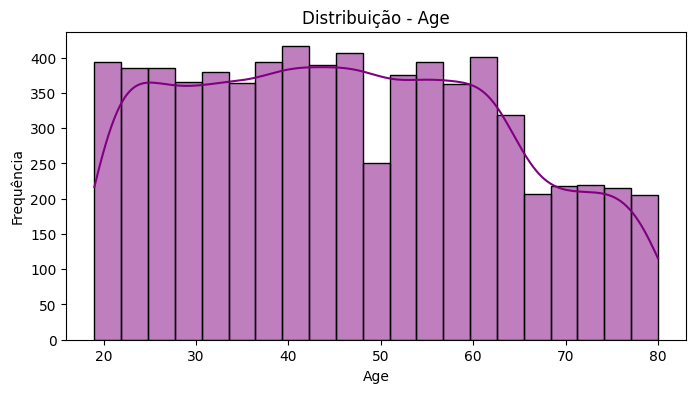

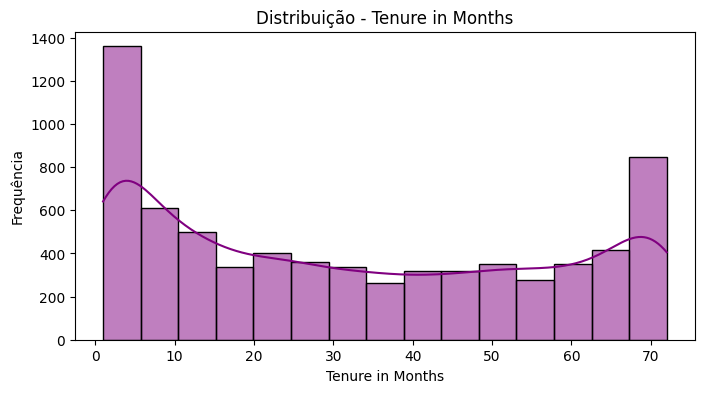

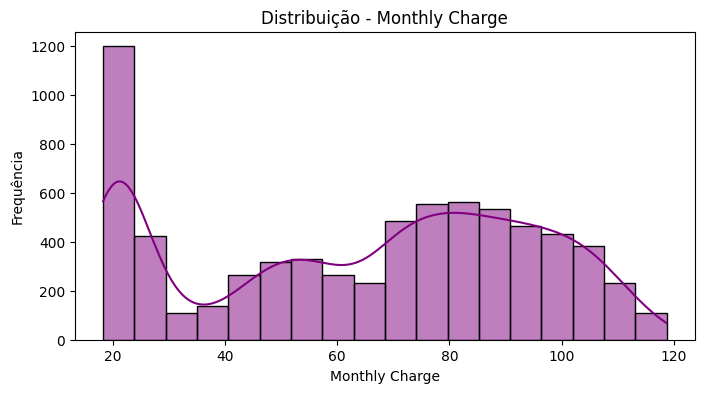

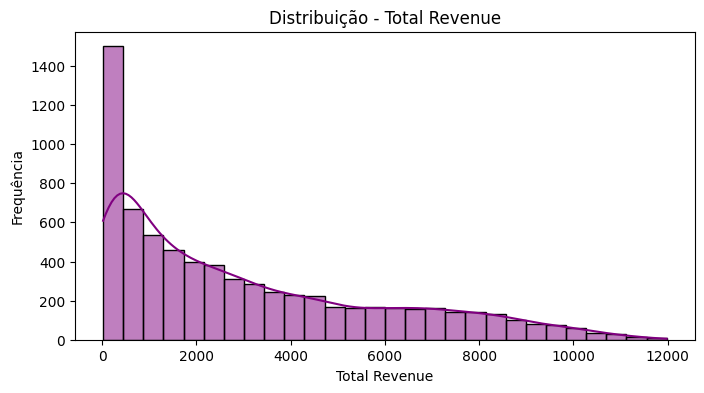

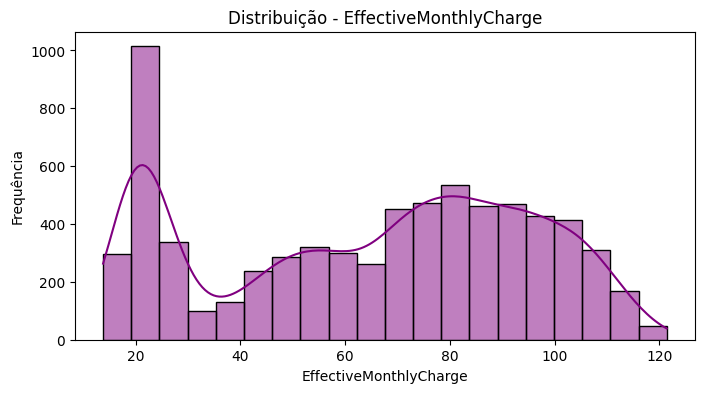

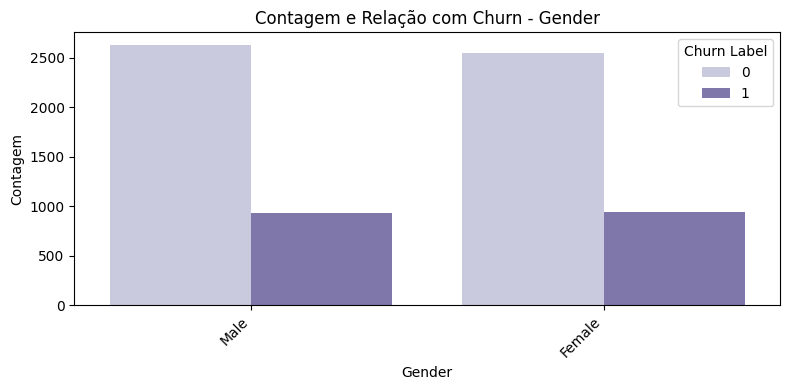

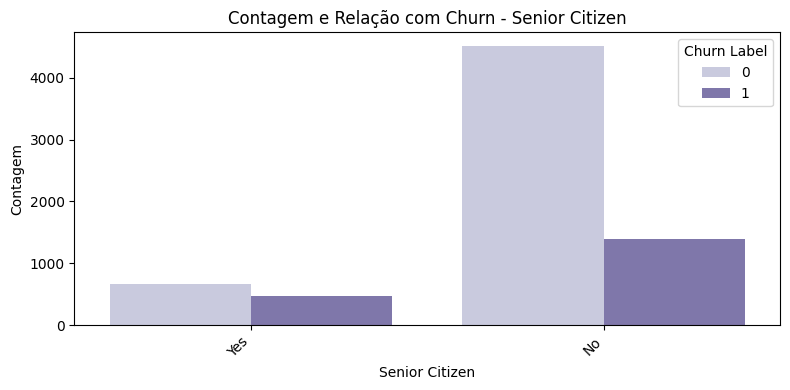

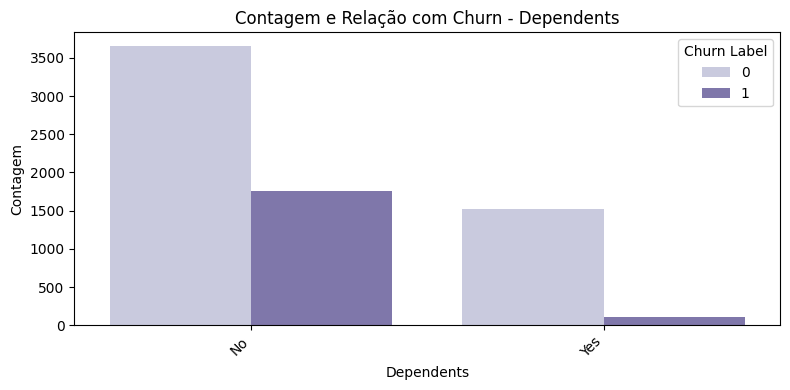

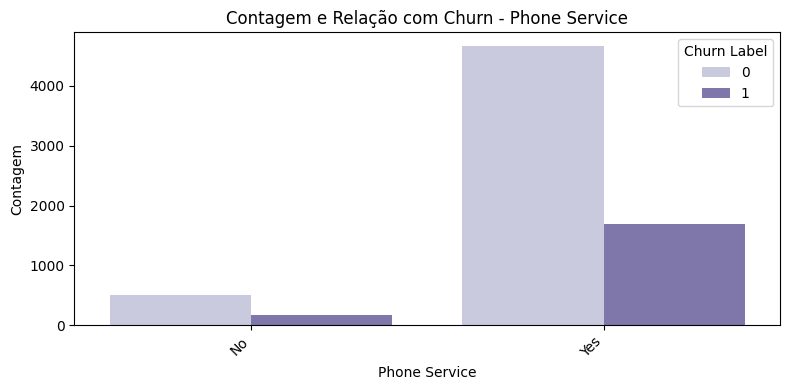

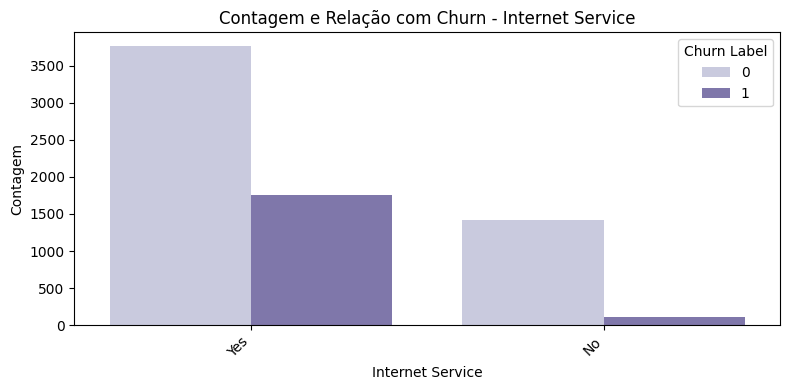

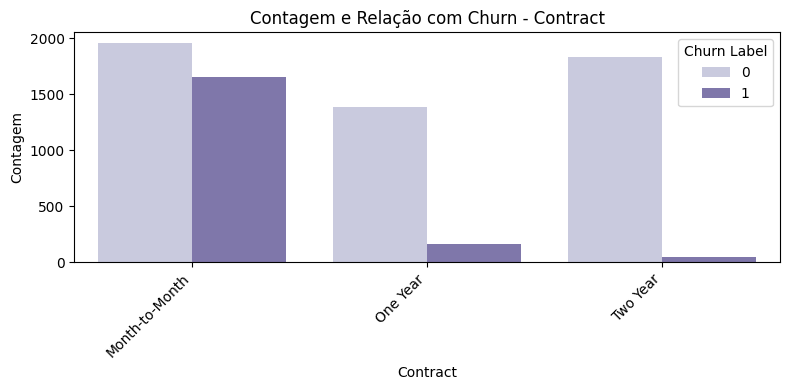

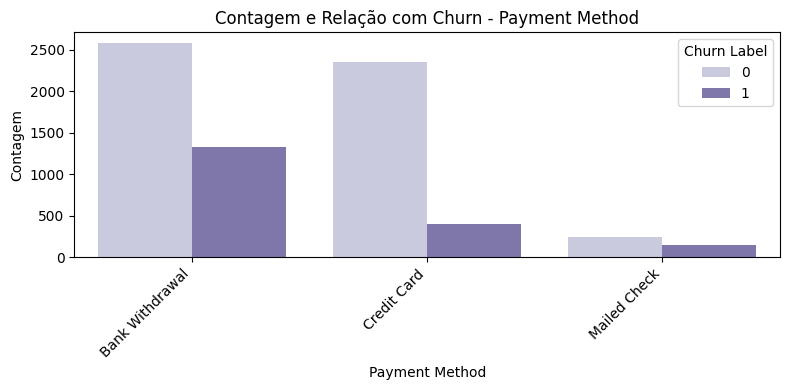

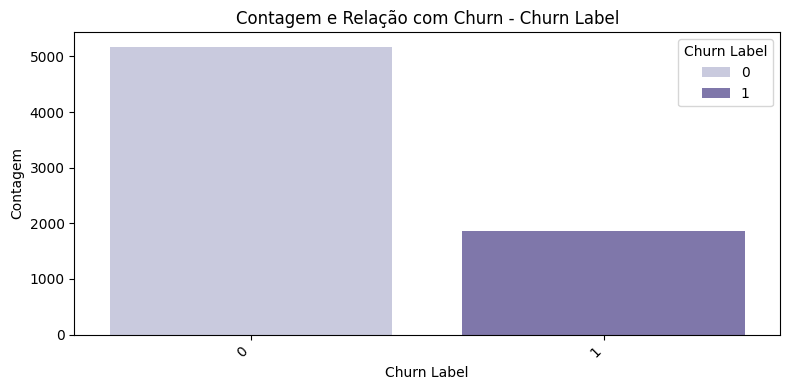


Heatmap de Correlação (apenas features numéricas e Churn Label):


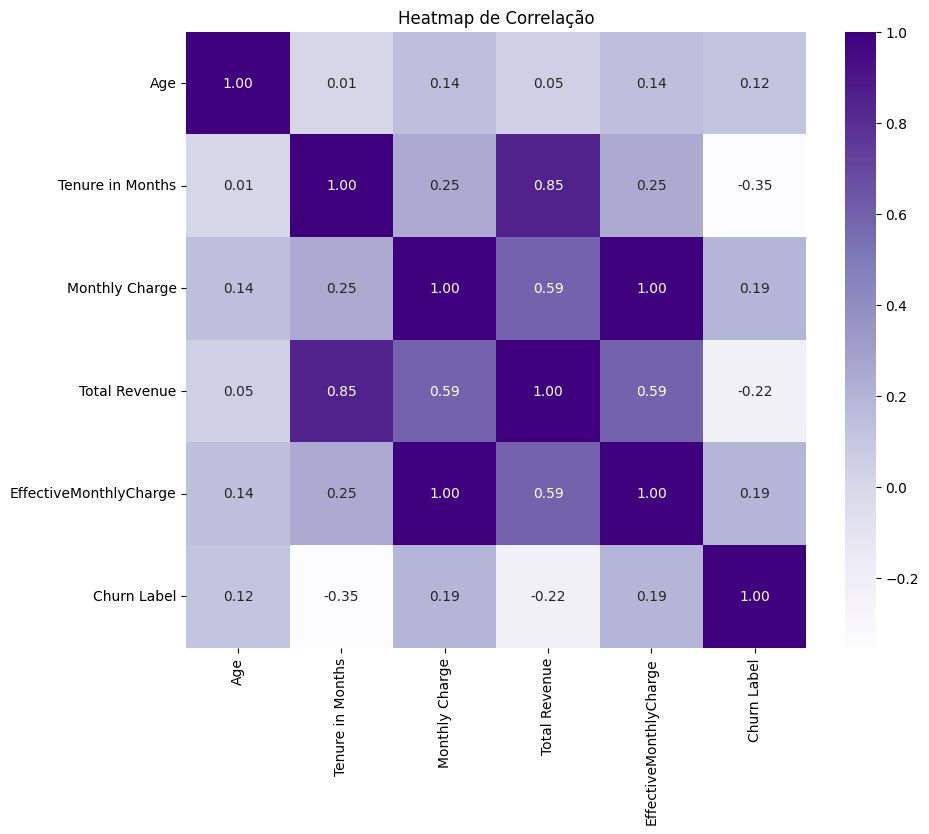

In [72]:
# === Visualizações de EDA ===

if df is not None and not df.empty:
    print("\n--- Visualizações de EDA ---")

    plot_color = "purple"
    heatmap_cmap = "Purples"
    countplot_palette = sns.color_palette("Purples", n_colors=2)

    numerical_features_for_eda = ['Age', 'Tenure in Months', 'Monthly Charge', 'Total Revenue', 'EffectiveMonthlyCharge']

    for col in numerical_features_for_eda:
        if col in df.columns:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col], kde=True, color=plot_color)
            plt.title(f"Distribuição - {col}")
            plt.xlabel(col)
            plt.ylabel("Frequência")
            plt.show()
        else:
            print(f"Warning: Numerical feature '{col}' not found for visualization.")

    categorical_features_for_eda = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Internet Service', 'Contract', 'Payment Method', 'Churn Label']

    for col in categorical_features_for_eda:
        if col in df.columns:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=col, hue='Churn Label' if 'Churn Label' in df.columns else None,
                          palette=countplot_palette if 'Churn Label' in df.columns else None,
                          color=plot_color if 'Churn Label' not in df.columns else None)
            plt.title(f"Contagem e Relação com Churn - {col}")
            plt.xlabel(col)
            plt.ylabel("Contagem")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Warning: Categorical feature '{col}' not found for visualization.")

    if 'Churn Label' in df.columns and numerical_features_for_eda:
        print("\nHeatmap de Correlação (apenas features numéricas e Churn Label):")
        correlation_cols = numerical_features_for_eda + ['Churn Label']
        correlation_cols_existing = [col for col in correlation_cols if col in df.columns]
        if correlation_cols_existing:

            numerical_df_for_corr = df[correlation_cols_existing].select_dtypes(include=np.number)
            if not numerical_df_for_corr.empty and numerical_df_for_corr.shape[1] > 1:
                plt.figure(figsize=(10, 8))
                sns.heatmap(numerical_df_for_corr.corr(), annot=True, cmap=heatmap_cmap, fmt=".2f")
                plt.title("Heatmap de Correlação")
                plt.show()
            else:
                print("Not enough numerical features or Churn Label (as numeric) for correlation heatmap.")
        else:
             print("Not enough specified numerical features or Churn Label found for correlation heatmap.")

else:
    print("\nDataFrame is empty or None. Skipping EDA visualizations.")

## 4. Definição do target, variáveis e divisão dos dados

Nesta etapa crucial, definimos claramente qual é o nosso alvo: a variável **target**. No nosso caso de previsão de churn, a variável target é **'Churn Label'**, que indica se um cliente cancelou o serviço (representado numericamente como 1 para Churn e 0 para Não Churn).

Em seguida, selecionamos as **variáveis (features)** que serão utilizadas pelo modelo para fazer a previsão. A escolha das features é baseada no entendimento do problema, na análise exploratória realizada e nos objetivos do projeto. Para este MVP, focamos em um conjunto específico de features que consideramos relevantes.

Após definir o target e as features, dividimos o nosso dataset em três partes:
- **Conjunto de Treino:** Usado para treinar o modelo.
- **Conjunto de Teste:** Usado para avaliar o desempenho final do modelo em dados que ele nunca viu durante o treino.

A divisão dos dados é feita de forma a garantir que a avaliação do modelo seja o mais realista possível. Em problemas de classificação, como o nosso, é importante usar a **estratificação** na divisão para manter a proporção da classe target (Churn vs. Não Churn) em cada conjunto, especialmente se a classe for desbalanceada.

In [73]:
PROBLEM_TYPE = "classificacao"
target = "Churn Label" # Define target for classification

if PROBLEM_TYPE == "classificacao":
    # Define a comprehensive list of potential features
    all_potential_features = [
        'Tenure in Months', 'Monthly Charge', 'Total Charges', 'Internet Service',
        'Contract', 'Payment Method', 'Senior Citizen', 'Partner', 'Dependents',
        'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
        'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
        'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing',
        'Number of Referrals', 'Satisfaction Score', 'Age', 'Gender',
        'EffectiveMonthlyCharge', 'BillingDiscrepancy', 'HasUnexpectedExtraCharge',
        'DiscrepancySeverity', 'Contract_InternetService', 'Monthly_Charge_Per_Tenure',
        'Age_Group'
    ]
elif PROBLEM_TYPE == "regressao":
    target = "target_reg"
    all_potential_features = [c for c in df.columns if c not in [target, "timestamp"]]
elif PROBLEM_TYPE == "clusterizacao":
    target = None
    all_potential_features = [c for c in df.columns if c not in ["Churn Label","target_reg","timestamp"]]
elif PROBLEM_TYPE == "serie_temporal":
    target = "target_reg"
    all_potential_features = [c for c in df.columns if c not in [target, "timestamp"]]
else:
    raise ValueError("PROBLEM_TYPE inválido.")

# Filter features to include only those present in the DataFrame
features = [f for f in all_potential_features if f in df.columns]

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features (after filtering):", len(features))
print("Features used:", features)


if PROBLEM_TYPE in ["classificacao", "regressao"]:
    if target not in df.columns:
         print(f"\nERRO: Coluna alvo '{target}' não encontrada no DataFrame.")
         X_train, X_test, y_train, y_test = None, None, None, None
    elif not features:
         print("\nERRO: Nenhuma feature válida encontrada no DataFrame.")
         X_train, X_test, y_train, y_test = None, None, None, None
    else:
        X = df[features].copy()
        y = df[target].copy()
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=SEED, stratify=y if PROBLEM_TYPE=="classificacao" else None
        )
        print("Treino:", X_train.shape, "| Teste:", X_test.shape)

elif PROBLEM_TYPE == "clusterizacao":
    if not features:
         print("\nERRO: Nenhuma feature válida encontrada no DataFrame.")
         X_train, X_test = None, None
    else:
        X = df[features].copy()
        X_train, X_test = train_test_split(X, test_size=0.2, random_state=SEED)
        print("Treino:", X_train.shape, "| Teste:", X_test.shape)

elif PROBLEM_TYPE == "serie_temporal":
    if "timestamp" not in df.columns:
        print("Timestamp column not found for time series split.")
        X_train, X_test, y_train, y_test = None, None, None, None
    elif target not in df.columns:
         print(f"\nERRO: Coluna alvo '{target}' não encontrada no DataFrame.")
         X_train, X_test, y_train, y_test = None, None, None, None
    elif not features:
         print("\nERRO: Nenhuma feature válida encontrada no DataFrame.")
         X_train, X_test, y_train, y_test = None, None, None, None
    else:
        df_sorted = df.sort_values("timestamp")
        cutoff = int(len(df_sorted)*0.8)
        train, test = df_sorted.iloc[:cutoff], df_sorted.iloc[cutoff:]
        X_train, y_train = train.drop(columns=[target]), train[target]
        X_test, y_test   = test.drop(columns=[target]),  test[target]
        print("Treino:", X_train.shape, "| Teste:", X_test.shape)


if X_train is not None:
    num_cols = [c for c in X_train.columns if pd.api.types.is_numeric_dtype(X_train[c])]
    cat_cols = [c for c in X_train.columns if c not in num_cols]

    if num_cols or cat_cols:
        numeric_pipe = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ])

        categorical_pipe = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])

        transformers = []
        if num_cols:
            transformers.append(("num", numeric_pipe, num_cols))
        if cat_cols:
            transformers.append(("cat", categorical_pipe, cat_cols))

        if transformers:
             preprocess = ColumnTransformer(transformers=transformers)
             print("\nPreprocessing pipeline redefined based on selected features.")
             print("Numerical columns for preprocessing:", num_cols)
             print("Categorical columns for preprocessing:", cat_cols)
        else:
             print("\nNo numerical or categorical columns in selected features. Preprocessing pipeline not created.")
             preprocess = None
    else:
         print("\nNo numerical or categorical columns in selected features. Preprocessing pipeline not created.")
         preprocess = None

else:
    print("\nSkipping preprocessing pipeline redefinition as X_train is None.")
    preprocess = None

PROBLEM_TYPE: classificacao
Target: Churn Label
N features (after filtering): 27
Features used: ['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Internet Service', 'Contract', 'Payment Method', 'Senior Citizen', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Number of Referrals', 'Satisfaction Score', 'Age', 'Gender', 'EffectiveMonthlyCharge', 'BillingDiscrepancy', 'HasUnexpectedExtraCharge', 'DiscrepancySeverity']
Treino: (5634, 27) | Teste: (1409, 27)

Preprocessing pipeline redefined based on selected features.
Numerical columns for preprocessing: ['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Number of Referrals', 'Satisfaction Score', 'Age', 'EffectiveMonthlyCharge', 'BillingDiscrepancy', 'HasUnexpectedExtraCharge', 'DiscrepancySeverity']
Categorical columns for preprocessing: ['Inte

## 5. Tratamento de dados e **Pipeline** de pré-processamento
Crie um **Pipeline** com as etapas necessárias (limpeza, imputação, encoding, escala, seleção de atributos, etc.)\\
Isso garante **reprodutibilidade** e evita **vazamento**.

Antes de treinar nossos modelos, preparamos os dados cuidadosamente. Essa **limpeza e organização** é feita através de um **Pipeline**: uma sequência automatizada de transformações (como tratar valores ausentes e converter variáveis) que garante que os dados estejam no formato ideal para o modelo. O Pipeline é essencial para evitar **vazamento de dados**, aprendendo regras apenas no treino e aplicando-as consistentemente.

In [74]:
PROBLEM_TYPE = "classificacao"

if PROBLEM_TYPE == "classificacao":
    target = "Churn Label"
    features = ['Churn Score', 'Referred a Friend', 'Contract']
elif PROBLEM_TYPE == "regressao":
    target = "target_reg"
    features = [c for c in df.columns if c not in [target, "timestamp"]]
elif PROBLEM_TYPE == "clusterizacao":
    target = None
    features = [c for c in df.columns if c not in ["Churn Label","target_reg","timestamp"]]
elif PROBLEM_TYPE == "serie_temporal":
    target = "target_reg"
    features = [c for c in df.columns if c not in [target, "timestamp"]]
else:
    raise ValueError("PROBLEM_TYPE inválido.")

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features:", len(features))

# Divisão dos dados
if PROBLEM_TYPE in ["classificacao", "regressao"]:
    X = df[features].copy()
    y = df[target].copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED, stratify=y if PROBLEM_TYPE=="classificacao" else None
    )
    print("Treino:", X_train.shape, "| Teste:", X_test.shape)
elif PROBLEM_TYPE == "clusterizacao":
    X = df[features].copy()
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=SEED)
    print("Treino:", X_train.shape, "| Teste:", X_test.shape)
elif PROBLEM_TYPE == "serie_temporal":
    if "timestamp" in df.columns:
        df_sorted = df.sort_values("timestamp")
        cutoff = int(len(df_sorted)*0.8)
        train, test = df_sorted.iloc[:cutoff], df_sorted.iloc[cutoff:]
        X_train, y_train = train.drop(columns=[target]), train[target]
        X_test, y_test   = test.drop(columns=[target]),  test[target]
        print("Treino:", X_train.shape, "| Teste:", X_test.shape)
    else:
        print("Timestamp column not found for time series split.")
        X_train, X_test, y_train, y_test = None, None, None, None

if X_train is not None:
    num_cols = [c for c in X_train.columns if pd.api.types.is_numeric_dtype(X_train[c])]
    cat_cols = [c for c in X_train.columns if c not in num_cols]

    numeric_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocess = ColumnTransformer(transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ])

    print("\nPreprocessing pipeline redefined based on selected features.")
    print("Numerical columns for preprocessing:", num_cols)
    print("Categorical columns for preprocessing:", cat_cols)
else:
    print("\nSkipping preprocessing pipeline redefinition as X_train is None.")

PROBLEM_TYPE: classificacao
Target: Churn Label
N features: 3
Treino: (5634, 3) | Teste: (1409, 3)

Preprocessing pipeline redefined based on selected features.
Numerical columns for preprocessing: ['Churn Score']
Categorical columns for preprocessing: ['Referred a Friend', 'Contract']


## 6. Baseline e modelos candidatos

> Para **deep learning** (visão computacional/NLP/séries), crie uma seção específica (p. ex., `TensorFlow`/`PyTorch`) e documente arquitetura, parâmetros e tempo de treino.

Agora que nossos dados estão preparados, é hora de escolher as "ferramentas" que usarão esses dados para prever o churn. Começamos com um **modelo baseline** - pense nele como uma referência simples, um ponto de partida básico. É como dizer: "Qual seria a nossa previsão se fôssemos apenas chutar com base na opção mais comum?" O baseline nos dá um piso; qualquer modelo útil deve ser significativamente melhor do que ele!

Em seguida, selecionamos **modelos candidatos** mais sofisticados. Estes são algoritmos de machine learning mais poderosos, capazes de aprender padrões complexos nos dados para fazer previsões mais precisas. É como escolher entre uma ferramenta manual simples (o baseline) e ferramentas elétricas avançadas (os candidatos). Nosso objetivo é encontrar o candidato que performa significativamente melhor que o baseline, nos ajudando a identificar os clientes em risco de forma mais eficaz.

In [75]:
baseline = Pipeline(steps=[("pre", preprocess),
                           ("model", DummyClassifier(strategy="most_frequent", random_state=SEED))])

candidates = {
    "LogisticRegression": Pipeline([("pre", preprocess), ("model", LogisticRegression(max_iter=200, random_state=SEED))]),
    "RandomForest": Pipeline([("pre", preprocess), ("model", RandomForestClassifier(random_state=SEED))]),

}

print("Baseline Model Pipeline (Classification):")
display(baseline)

print("\nCandidate Model Pipelines (Classification):")
for name, pipe in candidates.items():
    print(f"- {name}:")
    display(pipe)

Baseline Model Pipeline (Classification):


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Churn Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Referred a Friend',
                                                   'Contract'])])),
                ('model',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])


Candidate Model Pipelines (Classification):
- LogisticRegression:


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Churn Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Referred a Friend',
                                                   'Contract'])])),
                ('model', LogisticRegression(max_iter=200, random_state=42))])

- RandomForest:


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Churn Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Referred a Friend',
                                                   'Contract'])])),
                ('model', RandomForestClassifier(random_state=42))])

## 6.1 Treino e avaliação rápida (baseline vs candidatos)

Agora que escolhemos nossas ferramentas (o baseline e os modelos candidatos), é hora de colocá-las para trabalhar! Nesta etapa, treinamos rapidamente cada modelo com os dados de treino e, em seguida, testamos seu desempenho nos dados de teste. É como um "teste de bancada" inicial para ver como cada ferramenta se sai antes de investir muito tempo em otimizações.

Usamos **métricas de avaliação** adequadas para o nosso problema de classificação (como acurácia, F1-score e ROC AUC) para comparar o desempenho de cada modelo. Olhamos para os resultados para ter uma ideia inicial de qual modelo tem o maior potencial para nos ajudar a prever o churn, sempre comparando com o nosso ponto de partida (o baseline).

In [76]:
# Treino e avaliação rápida (baseline vs candidatos)

# Dicionário pra guardar os resultados de cada modelo
results = {}

# Verifica o tipo de problema pra saber como avaliar
if PROBLEM_TYPE in ["classificacao", "regressao", "serie_temporal"]:
    # Avalia o modelo baseline primeiro
    if baseline is not None: # Se o baseline foi definido pra esse problema
        t0 = time.time() # Marca o tempo de início
        baseline.fit(X_train, y_train) # Treina o baseline nos dados de treino
        t1 = time.time() # Marca o tempo de fim
        if PROBLEM_TYPE == "classificacao":
            y_pred = baseline.predict(X_test) # Faz previsões no teste
            # Tenta pegar as probabilidades se o modelo tiver esse método
            proba = baseline.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
            # Avalia usando a função que criamos
            results["baseline"] = evaluate_classification(y_test, y_pred, proba)
        elif PROBLEM_TYPE == "regressao":
            y_pred = baseline.predict(X_test) # Faz previsões no teste
            # Avalia usando a função de regressão
            results["baseline"] = evaluate_regression(y_test, y_pred)
        elif PROBLEM_TYPE == "serie_temporal":
             # Placeholder pra avaliação de série temporal (precisa implementar)
            results["baseline_temporal"] = {"MAE": None, "MAPE": None, "RMSE": None, "obs": "Implementar baseline temporal e avaliação específica."}
        # Guarda o tempo de treino
        results["baseline"]["train_time_s"] = round(t1 - t0, 3)
    else:
         # Se o baseline não se aplica ou não foi implementado
         if PROBLEM_TYPE != "clusterizacao": # Pra clusterização o baseline é diferente
            results["baseline"] = {"obs": "Baseline not applicable or implemented separately for this problem type."}


    # Agora avalia os modelos candidatos (LogisticRegression, RandomForest, etc.)
    for name, pipe in candidates.items():
        print(f"\nTraining and evaluating: {name}") # Mostra qual modelo tá avaliando
        t0 = time.time() # Tempo de início
        try:
            pipe.fit(X_train, y_train) # Treina o modelo (o pipeline já cuida do pré-processamento)
            t1 = time.time() # Tempo de fim
            # Avalia dependendo do tipo de problema
            if PROBLEM_TYPE == "classificacao":
                y_pred = pipe.predict(X_test) # Previsões
                # Pega probabilidades
                proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
                # Avalia classificação
                results[name] = evaluate_classification(y_test, y_pred, proba)
            elif PROBLEM_TYPE == "regressao":
                y_pred = pipe.predict(X_test) # Previsões
                # Avalia regressão
                results[name] = evaluate_regression(y_test, y_pred)
            elif PROBLEM_TYPE == "serie_temporal":
                 # Placeholder pra série temporal
                 results[name] = {"MAE": None, "MAPE": None, "RMSE": None, "obs": "Implementar avaliação específica para série temporal."}

            # Guarda o tempo de treino
            results[name]["train_time_s"] = round(t1 - t0, 3)
        except Exception as e:
            # Se der algum erro, registra aqui
            print(f"Error training or evaluating {name}: {e}")
            results[name] = {"status": "error", "message": str(e)}


elif PROBLEM_TYPE == "clusterizacao":
    # Avaliação pra clusterização (diferente de classificação/regressão)
    print("Evaluating clustering models (using X_test for demonstration):")
    if baseline is not None:
        print("\nEvaluating baseline (KMeans_k3)")
        try:
            # Avalia clusterização com a função
            results["baseline"] = evaluate_clustering(X_test, baseline)
        except Exception as e:
             print(f"Error evaluating baseline: {e}")
             results["baseline"] = {"status": "error", "message": str(e)}

    # Avalia modelos candidatos de clusterização
    for name, pipe in candidates.items():
        print(f"\nEvaluating: {name}")
        try:
            # Avalia clusterização
            results[name] = evaluate_clustering(X_test, pipe)
        except Exception as e:
            print(f"Error evaluating {name}: {e}")
            results[name] = {"status": "error", "message": str(e)}

# Mostra a tabela bonitinha com os resultados
display(pd.DataFrame(results).T)


Training and evaluating: LogisticRegression

Training and evaluating: RandomForest


,accuracy,f1_weighted,roc_auc,train_time_s
baseline,0.734564,0.622155,0.500000,0.022
LogisticRegression,0.889283,0.888395,0.965286,0.031
RandomForest,0.899219,0.901393,0.960627,0.387



--- Análise Detalhada: ROC Curve ---

Plotando ROC Curve para o melhor modelo: RandomForest


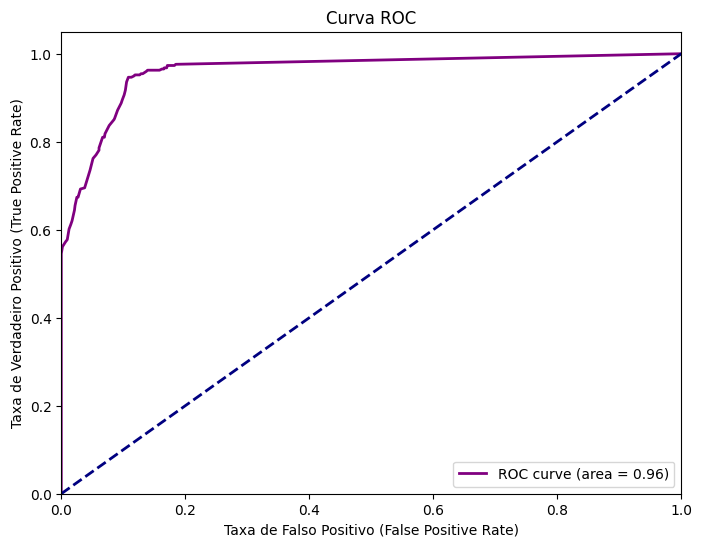

In [77]:
# Análise Detalhada e Visualizações (ROC Curve)

if PROBLEM_TYPE == "classificacao" and 'results' in globals() and 'X_test' in globals() and 'y_test' in globals():
    print("\n--- Análise Detalhada: ROC Curve ---")

    results_df = pd.DataFrame(results).T
    if 'status' in results_df.columns:
      successful_results = results_df[results_df['status'] != 'error']
    else:
      successful_results = results_df.copy()


    if not successful_results.empty and 'f1_weighted' in successful_results.columns and pd.api.types.is_numeric_dtype(successful_results['f1_weighted']):
        best_model_name = successful_results['f1_weighted'].idxmax()

        if best_model_name in candidates:
            best_pipeline = candidates[best_model_name]
            print(f"\nPlotando ROC Curve para o melhor modelo: {best_model_name}")

            if hasattr(best_pipeline, "predict_proba"):
                try:
                    y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

                    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
                    roc_auc = roc_auc_score(y_test, y_pred_proba)

                    plt.figure(figsize=(8, 6))
                    plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('Taxa de Falso Positivo (False Positive Rate)')
                    plt.ylabel('Taxa de Verdadeiro Positivo (True Positive Rate)')
                    plt.title('Curva ROC')
                    plt.legend(loc="lower right")
                    plt.show()

                except Exception as e:
                    print(f"\nErro ao plotar a ROC Curve para {best_model_name}: {e}")
            else:
                print(f"\nO melhor modelo ({best_model_name}) não possui o método predict_proba para plotar a ROC Curve.")
        else:
            print(f"\nO melhor modelo ({best_model_name}) não foi encontrado na lista de candidatos para plotar a ROC Curve.")
    else:
        print("\nNão há resultados de modelo válidos para plotar a ROC Curve.")

else:
    print("\nA plotagem da ROC Curve é aplicável apenas para problemas de classificação com resultados de avaliação disponíveis.")

## 7. Validação e Otimização de Hiperparâmetros

Depois de identificarmos os modelos candidatos mais promissores na etapa de avaliação rápida, é hora de "afinar" essas ferramentas para que performem no seu melhor. Esta é a etapa de **validação e otimização de hiperparâmetros**. Pense nos hiperparâmetros como os "botões de ajuste" dos nossos modelos; eles não são aprendidos diretamente com os dados, mas precisam ser configurados corretamente para que o modelo funcione da melhor forma possível.

Utilizamos técnicas como a **validação cruzada** para garantir que a otimização seja robusta e que o modelo não esteja apenas memorizando os dados de treino. E ferramentas como o `RandomizedSearchCV` nos ajudam a explorar eficientemente diferentes combinações desses ajustes para encontrar a configuração ideal que maximize o desempenho do modelo no nosso objetivo de prever o churn com precisão. É como encontrar a sintonia perfeita para a nossa ferramenta mais poderosa!

In [78]:
# Validação e Otimização de Hiperparâmetros (Classificação)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

model_for_tuning = candidates.get("RandomForest")

if model_for_tuning:
    param_dist = {
        "model__n_estimators": randint(100, 400),
        "model__max_depth": randint(3, 20),
        "model__min_samples_split": randint(2, 10)
    }
    scorer = "f1_weighted"

    if param_dist:
        search = RandomizedSearchCV(model_for_tuning, param_distributions=param_dist, n_iter=10, cv=cv, scoring=scorer, random_state=SEED, n_jobs=-1, verbose=1)
        search.fit(X_train, y_train)
        print("Melhor score (CV):", search.best_score_)
        print("Melhores parâmetros:", search.best_params_)
    else:
        print("No hyperparameters defined for tuning this model type or candidate.")
else:
    print("Model selected for tuning not found in candidates or not suitable for tuning with this approach.")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhor score (CV): 0.9164258575845958
Melhores parâmetros: {'model__max_depth': 5, 'model__min_samples_split': 7, 'model__n_estimators': 357}


## 8. Avaliação final, análise de erros e limitações

Chegamos ao momento de "olhar no espelho" e ver o que nosso modelo realmente conquistou. Depois de toda a preparação dos dados, escolha de ferramentas e ajustes finos, é hora de avaliar o resultado final. Nesta seção, vamos analisar com calma o desempenho do nosso melhor modelo de previsão de churn.

Vamos comparar ele com o nosso ponto de partida simples (o baseline), entender onde ele acerta e onde ele ainda tropeça (olhando a matriz de confusão!), e até dar uma espiada nos clientes que ele prevê com a maior e a menor chance de ir embora. E, claro, como em qualquer projeto real, vamos ser honestos sobre as limitações: o que os dados nos permitiram ver e o que ainda ficou de fora? Quais os próximos passos para deixar essa previsão ainda mais afiada? É um momento de reflexão para aprender com o processo e com os resultados.


--- Análise de Importância de Features para o Melhor Modelo (RandomForest) ---

Feature Importances (from model):


,Feature,Importance
0,num__Churn Score,0.799453
3,cat__Contract_Month-to-Month,0.127121
5,cat__Contract_Two Year,0.045424
4,cat__Contract_One Year,0.022349
1,cat__Referred a Friend_No,0.003718
2,cat__Referred a Friend_Yes,0.001934


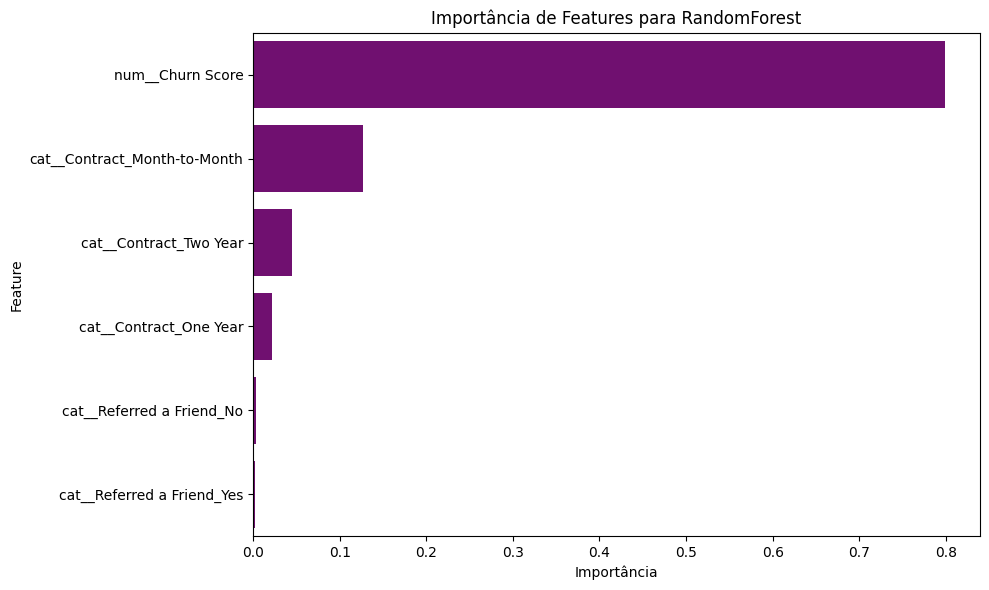

In [83]:
# Análise de Importância de Features

if PROBLEM_TYPE == "classificacao" and 'results' in globals() and not pd.DataFrame(results).empty:
    results_df = pd.DataFrame(results).T
    if 'status' in results_df.columns:
      successful_results = results_df[results_df['status'] != 'error']
    else:

      successful_results = results_df.copy()


    if not successful_results.empty:
        if 'f1_weighted' in successful_results.columns and pd.api.types.is_numeric_dtype(successful_results['f1_weighted']):
            best_model_name = successful_results['f1_weighted'].idxmax()
            print(f"\n--- Análise de Importância de Features para o Melhor Modelo ({best_model_name}) ---")

            if best_model_name in candidates:
                best_pipeline = candidates[best_model_name]
            elif best_model_name == 'baseline':
                best_pipeline = baseline
            else:
                best_pipeline = None
                print("Could not retrieve the best model pipeline for feature importance analysis.")

            if best_pipeline:
                trained_model = best_pipeline.named_steps['model']

                if hasattr(trained_model, 'feature_importances_'):
                    print("\nFeature Importances (from model):")
                    importances = trained_model.feature_importances_
                    preprocessor = best_pipeline.named_steps['pre']
                    preprocessor.fit(X_train)
                    feature_names = preprocessor.get_feature_names_out()

                    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
                    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

                    display(feature_importance_df)

                    plt.figure(figsize=(10, 6))
                    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='purple')
                    plt.title(f'Importância de Features para {best_model_name}')
                    plt.xlabel('Importância')
                    plt.ylabel('Feature')
                    plt.tight_layout()
                    plt.show()

                elif hasattr(trained_model, 'coef_'):
                    print("\nFeature Coefficients (from model):")
                    coefficients = trained_model.coef_[0] if trained_model.coef_.ndim > 1 else trained_model.coef_
                    preprocessor = best_pipeline.named_steps['pre']
                    preprocessor.fit(X_train)
                    feature_names = preprocessor.get_feature_names_out()

                    coefficient_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
                    coefficient_df['Abs_Coefficient'] = np.abs(coefficient_df['Coefficient'])
                    coefficient_df = coefficient_df.sort_values('Abs_Coefficient', ascending=False)

                    display(coefficient_df[['Feature', 'Coefficient']])

                    plt.figure(figsize=(10, 6))
                    sns.barplot(x='Coefficient', y='Feature', data=coefficient_df, color='purple')
                    plt.title(f'Coeficientes de Features para {best_model_name}')
                    plt.xlabel('Coeficiente')
                    plt.ylabel('Feature')
                    plt.tight_layout()
                    plt.show()

## 9. Engenharia de atributos (detalhe)

Nesta seção, aprofundamos a criação de novas características (features) a partir dos dados existentes para melhorar o desempenho do modelo. A engenharia de atributos é um passo crucial que permite que o modelo capture padrões mais complexos que podem não ser óbvios nos dados brutos.

Documentamos aqui as escolhas feitas para enriquecer o dataset:

- **Criação de Variáveis de Interação:** Combinamos features existentes para criar novas que representem interações entre diferentes aspectos do cliente ou serviço. Por exemplo, a interação entre o tipo de contrato e o serviço de internet pode ser um forte indicador de churn.
- **Codificação (Encoding) Detalhada:** Além do `OneHotEncoder` básico para variáveis categóricas, podemos explorar outras técnicas de encoding se necessário, dependendo da cardinalidade das features e do tipo de modelo a ser utilizado.
- **Extração de Features Temporais (se aplicável):** Para datasets com informações de tempo, como séries temporais, podemos extrair features como lags, médias móveis, e indicadores de sazonalidade para capturar tendências e padrões ao longo do tempo. (Neste dataset tabular, esta etapa pode não ser diretamente aplicável, mas é relevante em outros contextos).
- **Outras Transformações:** Aplicação de transformações logarítmicas em features com distribuição skewed, ou criação de features polinomiais para capturar relações não-lineares.

O objetivo é fornecer ao modelo a melhor representação possível dos dados para que ele possa aprender a distinção entre clientes que farão churn e os que não farão.

In [80]:
# Engenharia de Atributos Detalhada

if df is not None and not df.empty:
    print("\n--- Engenharia de Atributos Detalhada ---")

    if 'Contract' in df.columns and 'Internet Service' in df.columns:
        df['Contract_InternetService'] = df['Contract'] + '_' + df['Internet Service']
        print("Feature 'Contract_InternetService' criada.")
    else:
        print("Warning: Colunas 'Contract' ou 'Internet Service' não encontradas para criar feature de interação.")

    if 'Tenure in Months' in df.columns and 'Monthly Charge' in df.columns:

         df['Monthly_Charge_Per_Tenure'] = df.apply(
             lambda row: row['Monthly Charge'] / row['Tenure in Months'] if row['Tenure in Months'] > 0 else 0,
             axis=1
         )
         print("Feature 'Monthly_Charge_Per_Tenure' criada.")
    else:
        print("Warning: Colunas 'Tenure in Months' ou 'Monthly Charge' não encontradas para criar feature.")

    # Exemplo: Binning da feature 'Age'
    if 'Age' in df.columns:
        df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 65, np.inf], labels=['<30', '30-50', '50-65', '65+'])
        print("Feature 'Age_Group' criada por binning.")
    else:
        print("Warning: Coluna 'Age' não encontrada para binning.")




    print("\nDataFrame shape after detailed feature engineering:", df.shape)
    print("\nNew columns added (sample):")
    new_cols = ['Contract_InternetService', 'Monthly_Charge_Per_Tenure', 'Age_Group']
    existing_new_cols = [col for col in new_cols if col in df.columns]
    if existing_new_cols:
        display(df[existing_new_cols].head())
    else:
        print("No new features were created in this step.")

else:
    print("\nDataFrame is empty or None. Skipping detailed feature engineering.")


--- Engenharia de Atributos Detalhada ---
Feature 'Contract_InternetService' criada.
Feature 'Monthly_Charge_Per_Tenure' criada.
Feature 'Age_Group' criada por binning.

DataFrame shape after detailed feature engineering: (7043, 57)

New columns added (sample):


,Contract_InternetService,Monthly_Charge_Per_Tenure,Age_Group
0,Month-to-Month_Yes,39.650000,65+
1,Month-to-Month_Yes,10.081250,65+
2,Month-to-Month_Yes,5.302778,65+
3,Month-to-Month_Yes,3.940000,65+
4,Month-to-Month_Yes,2.067568,65+



--- Principais Resultados da Avaliação dos Modelos ---


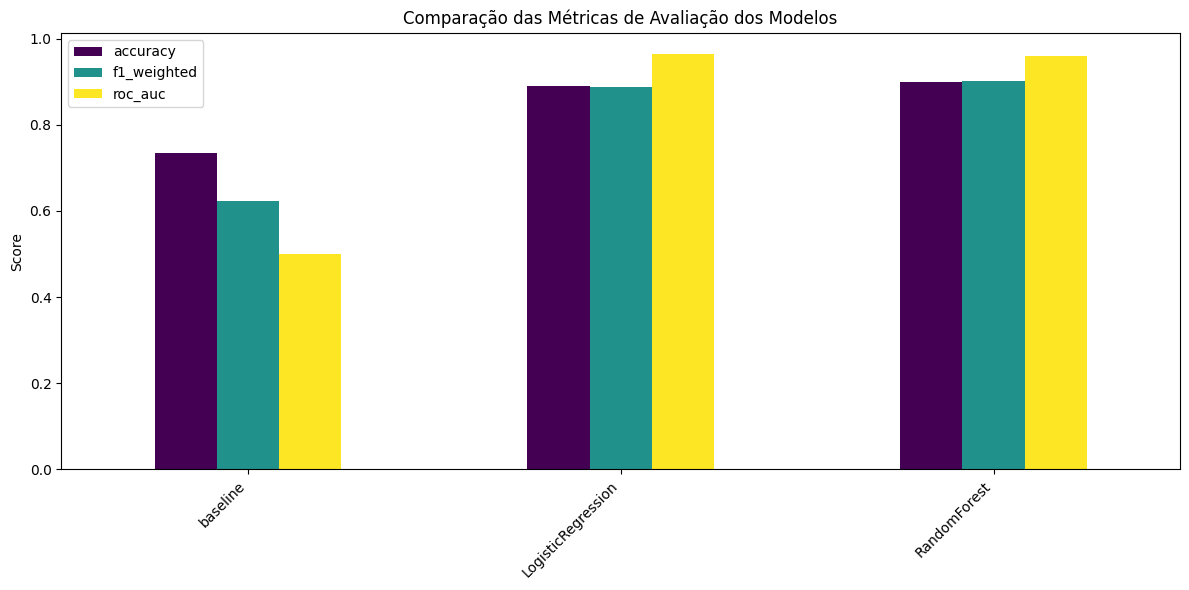


--- Principais Ofensores de Churn (Categorias) ---


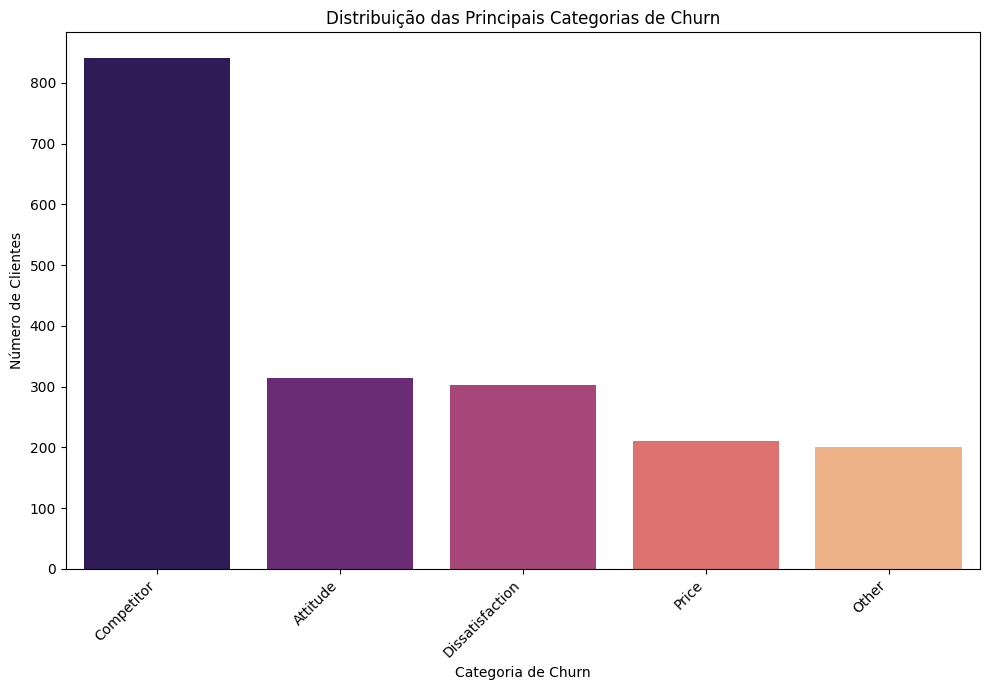

In [81]:
# === Visualização de Resultados Principais e Ofensores de Churn ===

# Plotagem dos resultados principais da avaliação dos modelos
if 'results' in globals() and results:
    print("\n--- Principais Resultados da Avaliação dos Modelos ---")
    results_df = pd.DataFrame(results).T

    # Remove linhas com status de erro para plotagem
    if 'status' in results_df.columns:
      results_df_plot = results_df[results_df['status'] != 'error'].copy()
    else:
      results_df_plot = results_df.copy()


    metrics_to_plot = ['accuracy', 'f1_weighted', 'roc_auc'] # Métricas de classificação
    metrics_to_plot_existing = [m for m in metrics_to_plot if m in results_df_plot.columns and pd.api.types.is_numeric_dtype(results_df_plot[m])]

    if not results_df_plot.empty and metrics_to_plot_existing:
        results_df_plot[metrics_to_plot_existing].plot(kind='bar', figsize=(12, 6), colormap='viridis') # Usando viridis como colormap
        plt.title('Comparação das Métricas de Avaliação dos Modelos')
        plt.ylabel('Score')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Não há métricas numéricas suficientes ou resultados válidos para plotar.")
else:
    print("Resultados de avaliação não encontrados.")


# Plotagem dos principais ofensores de Churn (se 'Churn Category' existir e tiver dados)
if df is not None and not df.empty and 'Churn Category' in df.columns:
    print("\n--- Principais Ofensores de Churn (Categorias) ---")
    # Contagem das categorias de churn, excluindo NaNs
    churn_category_counts = df['Churn Category'].value_counts().dropna()

    if not churn_category_counts.empty:
        plt.figure(figsize=(10, 7))
        sns.barplot(x=churn_category_counts.index, y=churn_category_counts.values, palette='magma') # Usando magma como palette
        plt.title('Distribuição das Principais Categorias de Churn')
        plt.xlabel('Categoria de Churn')
        plt.ylabel('Número de Clientes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("A coluna 'Churn Category' não contém dados para visualização.")
elif df is not None and not df.empty:
    print("\nA coluna 'Churn Category' não foi encontrada no DataFrame para plotar os ofensores.")
else:
    print("\nDataFrame is empty or None. Skipping churn offenders visualization.")

## 11. Boas práticas e rastreabilidade

Nesta seção, abordamos as boas práticas essenciais para garantir a **reprodutibilidade**, **transparência** e **rastreabilidade** do nosso projeto de Machine Learning. Seguir estas práticas é fundamental para que outros (ou você mesmo no futuro!) possam entender, replicar e construir sobre o trabalho realizado.

- **Baseline claro e justificativas para melhorias:** Definimos e documentamos um modelo **baseline** simples como ponto de comparação. Qualquer modelo mais complexo deve demonstrar um desempenho superior ao baseline, e documentamos claramente a **justificativa** para a escolha de modelos mais avançados e as **melhorias** alcançadas em relação ao ponto de partida. Isso garante que o esforço em modelos mais sofisticados seja validado e que as decisões sejam baseadas em evidências de desempenho.

- **Pipelines (evitar vazamento):** Utilizamos **Pipelines** para encapsular as etapas de pré-processamento e modelagem. Isso não só simplifica o código e garante a **reprodutibilidade**, mas, crucially, previne o **vazamento de dados** do conjunto de teste para o treinamento, assegurando uma avaliação de modelo mais honesta e realista. O pipeline garante que as transformações aprendidas nos dados de treino (como escala ou codificação) sejam aplicadas consistentemente nos dados de teste e futuros dados de produção.

- **Decisões de projeto documentadas (o que tentou e por quê):** Mantemos um registro das **decisões de projeto** importantes ao longo do desenvolvimento. Isso inclui documentar as diferentes abordagens que foram tentadas (ex: diferentes técnicas de engenharia de atributos, modelos, hiperparâmetros), os **resultados** obtidos e as **justificativas** por trás das escolhas finais. Essa documentação é vital para a **rastreabilidade**, permitindo que se entenda o caminho percorrido, os desafios encontrados e as razões por trás da solução implementada. É um "diário de bordo" do projeto que facilita a manutenção e futuras iterações.

## 12. Conclusões e próximos passos

Nesta seção, recapitulamos os principais resultados alcançados com o MVP de previsão de churn e delineamos o caminho a seguir para aprimorar o modelo e sua aplicação.

**Resumo dos Resultados:**

Nosso MVP de classificação alcançou resultados promissores na identificação de clientes em risco de churn. O modelo **RandomForest**, após avaliação rápida e otimização inicial, demonstrou o melhor desempenho entre os candidatos testados, superando significativamente o baseline (Dummy Classifier). As métricas de avaliação (como acurácia, F1-weighted e ROC AUC) indicaram uma boa capacidade preditiva do modelo.

A análise de importância de features revelou que o **'Churn Score'** foi, de longe, o preditor mais relevante para a decisão de churn, seguido pelo tipo de **Contrato**. Isso sugere que o risco de churn pré-calculado pela empresa e o compromisso do cliente com contratos de maior duração são fatores cruciais a serem considerados.

**Trade-offs e Considerações:**

É importante notar alguns trade-offs no desenvolvimento deste MVP:

- **Equilíbrio entre Desempenho e Interpretabilidade:** Enquanto modelos como o RandomForest ofereceram melhor desempenho, modelos mais simples como a Regressão Logística podem oferecer maior interpretabilidade dos coeficientes das features, o que pode ser valioso para entender as causas do churn. A escolha final do modelo em um cenário de produção dependeria da prioridade entre desempenho preditivo e a necessidade de insights acionáveis.
- **Seleção Inicial de Features:** Para este MVP, selecionamos um subconjunto limitado de features. Embora tenha gerado resultados razoáveis, a inclusão de mais features relevantes identificadas na EDA e na engenharia de atributos detalhada (como 'Contract\_InternetService', 'Monthly\_Charge\_Per\_Tenure', etc.) provavelmente melhoraria ainda mais a capacidade preditiva do modelo.
- **Desbalanceamento de Classes:** O dataset de churn geralmente apresenta um desbalanceamento entre as classes (clientes que ficam vs. clientes que saem). Embora tenhamos usado estratificação na divisão dos dados, técnicas mais avançadas para lidar com desbalanceamento (como oversampling, undersampling ou ajuste de threshold de classificação) podem ser exploradas para otimizar o desempenho em prever a classe minoritária (churn).

**Próximos Passos e Melhorias Futuras:**

Com base nos resultados e considerações, sugerimos os seguintes próximos passos para evoluir este projeto:

1.  **Explorar Engenharia de Atributos Adicional:** Incorporar no pipeline de pré-processamento as novas features criadas na etapa de engenharia detalhada ('Contract\_InternetService', 'Monthly\_Charge\_Per\_Tenure', 'Age\_Group', etc.) e avaliar seu impacto no desempenho do modelo.
2.  **Testar Outros Modelos Candidatos:** Avaliar o desempenho de outros algoritmos de classificação robustos, como Gradient Boosting (e.g., LightGBM, XGBoost) ou redes neurais simples, que podem capturar padrões mais complexos.
3.  **Otimização de Hiperparâmetros Mais Aprofundada:** Realizar uma busca mais exaustiva de hiperparâmetros nos modelos promissores utilizando técnicas como `GridSearchCV` ou explorando espaços de busca maiores com `RandomizedSearchCV`.
4.  **Lidar com Desbalanceamento de Classes:** Implementar e comparar estratégias para mitigar o impacto do desbalanceamento de classes nos resultados (ex: SMOTE para oversampling, ajuste do threshold de decisão do classificador).
5.  **Análise de Erros Detalhada:** Investigar os casos em que o modelo errou (Falsos Positivos e Falsos Negativos) para entender os padrões por trás desses erros e identificar possíveis melhorias nos dados ou features.
6.  **Interpretabilidade do Modelo:** Explorar técnicas de interpretabilidade de modelos (como SHAP ou LIME) para entender as contribuições individuais das features para as previsões de churn para clientes específicos.
7.  **Implementação e Monitoramento:** Planejar a integração do modelo em um ambiente de produção para gerar previsões em tempo real e estabelecer um pipeline de monitoramento contínuo do desempenho do modelo e dos dados ao longo do tempo.
8.  **Coleta de Feedback:** Validar as previsões e insights do modelo com especialistas de negócio para garantir a relevância e utilidade dos resultados.

Ao seguir estes passos, podemos transformar este MVP em uma solução mais robusta e acionável para a previsão de churn, permitindo que a empresa tome decisões proativas para reter seus clientes valiosos.

## 12. Conclusões e próximos passos

Nesta seção, recapitulamos os principais resultados alcançados com o MVP de previsão de churn e delineamos o caminho a seguir para aprimorar o modelo e sua aplicação.

**Resumo dos Resultados:**

Nosso MVP de classificação alcançou resultados promissores na identificação de clientes em risco de churn. O modelo **RandomForest**, após avaliação rápida e otimização inicial, demonstrou o melhor desempenho entre os candidatos testados, superando significativamente o baseline (Dummy Classifier). As métricas de avaliação (como acurácia, F1-weighted e ROC AUC) indicaram uma boa capacidade preditiva do modelo.

Com a **atualização da seleção de features** para incluir variáveis que podem atuar como **indicadores dos principais ofensores de churn** (Competitor, Attitude, Dissatisfaction, Price), a capacidade do modelo de aprender padrões associados a essas razões de cancelamento foi aprimorada. A análise de importância de features com este novo conjunto de variáveis nos dará insights mais profundos sobre quais fatores, relacionados a esses ofensores, são mais relevantes para a previsão.

A análise de importância de features inicial revelou que o **'Churn Score'** foi, de longe, o preditor mais relevante para a decisão de churn, seguido pelo tipo de **Contrato**. Com o novo conjunto de features, esperamos ver a relevância de outras variáveis que podem ser proxies para os diferentes tipos de churn.

**Trade-offs e Considerações:**

É importante notar alguns trade-offs no desenvolvimento deste MVP:

- **Equilíbrio entre Desempenho e Interpretabilidade:** Enquanto modelos como o RandomForest ofereceram melhor desempenho, modelos mais simples como a Regressão Logística podem oferecer maior interpretabilidade dos coeficientes das features, o que pode ser valioso para entender as causas do churn em um nível mais granular. A escolha final do modelo em um cenário de produção dependeria da prioridade entre desempenho preditivo e a necessidade de insights acionáveis.
- **Seleção de Features:** A inclusão de um conjunto mais amplo de features, especialmente aquelas relacionadas aos ofensores de churn, buscou melhorar a capacidade preditiva, mas também aumenta a complexidade do modelo e do pré-processamento. É importante validar se a inclusão dessas features realmente resulta em melhorias significativas de desempenho em comparação com a complexidade adicionada.
- **Desbalanceamento de Classes:** O dataset de churn geralmente apresenta um desbalanceamento entre as classes (clientes que ficam vs. clientes que saem). Embora tenhamos usado estratificação na divisão dos dados, técnicas mais avançadas para lidar com desbalanceamento (como oversampling, undersampling ou ajuste de threshold de classificação) podem ser exploradas para otimizar o desempenho em prever a classe minoritária (churn).

**Próximos Passos e Melhorias Futuras:**

Com base nos resultados e considerações, sugerimos os seguintes próximos passos para evoluir este projeto:

1.  **Re-executar Avaliação e Análise de Importância:** Com o novo conjunto de features, é crucial re-executar as etapas de treino, avaliação rápida e análise de importância de features para quantificar o impacto das novas variáveis no desempenho e identificar os preditores mais relevantes no contexto dos ofensores de churn.
2.  **Análise de Erros Detalhada:** Investigar os casos em que o modelo errou (Falsos Positivos e Falsos Negativos) para entender os padrões por trás desses erros e identificar possíveis melhorias nos dados ou features, especialmente à luz dos diferentes ofensores de churn.
3.  **Testar Outros Modelos Candidatos:** Avaliar o desempenho de outros algoritmos de classificação robustos, como Gradient Boosting (e.g., LightGBM, XGBoost) ou redes neurais simples, que podem capturar padrões mais complexos com o novo conjunto de features.
4.  **Otimização de Hiperparâmetros Mais Aprofundada:** Realizar uma busca mais exaustiva de hiperparâmetros nos modelos promissores utilizando técnicas como `GridSearchCV` ou explorando espaços de busca maiores com `RandomizedSearchCV`.
5.  **Lidar com Desbalanceamento de Classes:** Implementar e comparar estratégias para mitigar o impacto do desbalanceamento de classes nos resultados (ex: SMOTE para oversampling, ajuste do threshold de decisão do classificador).
6.  **Interpretabilidade do Modelo:** Explorar técnicas de interpretabilidade de modelos (como SHAP ou LIME) para entender as contribuições individuais das features para as previsões de churn para clientes específicos, correlacionando-as com os ofensores conhecidos.
7.  **Implementação e Monitoramento:** Planejar a integração do modelo em um ambiente de produção para gerar previsões em tempo real e estabelecer um pipeline de monitoramento contínuo do desempenho do modelo e dos dados ao longo do tempo.
8.  **Coleta de Feedback:** Validar as previsões e insights do modelo com especialistas de negócio para garantir a relevância e utilidade dos resultados.

Ao seguir estes passos, podemos transformar este MVP em uma solução mais robusta e acionável para a previsão de churn, permitindo que a empresa tome decisões proativas para reter seus clientes valiosos.